## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import wget
wget.download('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

100% [..........................................................................] 1423529 / 1423529

'housing (8).csv'

In [3]:
df0 = pd.read_csv("housing.csv")
df0.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


In [4]:
df0.shape

(20640, 10)

### Preparing the dataset 

For this homework, we only want to use a subset of data. This is the same subset we used in homework #2.
But in contrast to homework #2, we are going to use all columns of the dataset.

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Preparation:

* Fill missing values with zeros.
* Apply the log transform to `median_house_value`.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.

In [5]:
df = df0[df0['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
df.reset_index(drop=True, inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [6]:
df.shape

(15687, 10)

In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15687 entries, 0 to 15686
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
 9   ocean_proximity     15687 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,-119.217442,35.467307,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,191943.020017
std,1.780380,2.066387,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,108801.077620
min,-124.140000,32.610000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.070000,33.940000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,111300.000000
50%,-118.370000,34.160000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,166900.000000
75%,-117.990000,37.340000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,241100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
df.describe(include = object)

,ocean_proximity
count,15687
unique,2
top,<1H OCEAN
freq,9136


In [11]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
df.duplicated().sum()

0

**Fill the missing values with 0**

In [13]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
# df.fillna(0, inplace=True)

df.total_bedrooms = df.total_bedrooms.fillna(0)

df.isnull().sum()

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_17728\3837818318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.total_bedrooms = df.total_bedrooms.fillna(0)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

**Apply the log transform to `median_house_value`**

In [15]:
df['log_median_house_value'] = np.log1p(df['median_house_value'])
df.drop('median_house_value', axis=1, inplace=True) 
df.head()

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_17728\4195895875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_median_house_value'] = np.log1p(df['median_house_value'])
C:\Users\Toshiba\AppData\Local\Temp\ipykernel_17728\4195895875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('median_house_value', axis=1, inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,log_median_house_value
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,<1H OCEAN,12.973866
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,<1H OCEAN,12.287657
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,<1H OCEAN,12.419574
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN,12.554971
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,<1H OCEAN,12.287196


In [16]:
df['ocean_proximity'].value_counts()

<1H OCEAN    9136
INLAND       6551
Name: ocean_proximity, dtype: int64

In [17]:
df['ocean_proximity'] = df['ocean_proximity'].replace({'<1H OCEAN':'OCEAN'})

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_17728\691291182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ocean_proximity'] = df['ocean_proximity'].replace({'<1H OCEAN':'OCEAN'})


In [18]:
df['ocean_proximity'].value_counts()

OCEAN     9136
INLAND    6551
Name: ocean_proximity, dtype: int64

**Split the data with 60%/20%/20% distribution**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [21]:
len(df_full_train), len(df_test)

(12549, 3138)

In [22]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [23]:
len(df_train), len(df_val), len(df_test)

(9411, 3138, 3138)

In [24]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,log_median_house_value
0,-120.25,37.93,13.0,493.0,76.0,196.0,68.0,3.3750,INLAND,11.806349
1,-118.40,34.00,10.0,1526.0,339.0,705.0,268.0,5.8083,OCEAN,12.681689
2,-121.67,38.85,46.0,645.0,131.0,410.0,122.0,1.7417,INLAND,11.611874
3,-118.14,33.88,24.0,3305.0,982.0,2085.0,881.0,2.6641,OCEAN,12.032915
4,-118.11,33.92,34.0,1414.0,263.0,983.0,264.0,4.1767,OCEAN,11.961456


In [26]:
df_val.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,log_median_house_value
0,-122.74,38.48,12.0,4174.0,670.0,1882.0,647.0,4.5510,OCEAN,12.091228
1,-121.67,36.93,22.0,569.0,132.0,542.0,125.0,2.1875,OCEAN,12.141539
2,-120.90,39.95,20.0,1349.0,238.0,601.0,203.0,3.5417,INLAND,11.478344
3,-118.14,34.02,44.0,1715.0,460.0,1740.0,423.0,2.7019,OCEAN,11.940159
4,-118.11,33.80,36.0,1837.0,319.0,810.0,305.0,4.3897,OCEAN,12.367345


In [27]:
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,log_median_house_value
0,-122.02,37.32,27.0,4336.0,754.0,2009.0,734.0,6.3923,OCEAN,12.760822
1,-121.32,37.97,43.0,2453.0,490.0,1093.0,438.0,2.9107,INLAND,11.394153
2,-115.37,32.81,23.0,1458.0,294.0,866.0,275.0,2.3594,INLAND,11.215880
3,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,INLAND,12.008847
4,-120.50,37.30,29.0,1572.0,456.0,1697.0,429.0,1.7600,INLAND,11.054075


In [28]:
y_train = df_train.log_median_house_value.values
y_val = df_val.log_median_house_value.values
y_test = df_test.log_median_house_value.values

In [29]:
len(y_train), len(y_val), len(y_test)

(9411, 3138, 3138)

In [30]:
print(y_train)
print(y_val)
print(y_test)

[11.80634853 12.68168862 11.61187447 ... 11.46374572 11.93032573
 10.92054627]
[12.09122841 12.14153946 11.47834437 ... 12.61686023 11.03651737
 11.65182617]
[12.76082233 11.39415319 11.21587969 ... 11.22791981 12.11615341
 12.48824331]


In [31]:
del df_train["log_median_house_value"]
del df_val["log_median_house_value"]
del df_test["log_median_house_value"]

**Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices**

In [32]:
from sklearn.feature_extraction import DictVectorizer

In [33]:
numerical= df.drop(['log_median_house_value'], axis=1).select_dtypes('number').columns.to_list()

categorical = df.select_dtypes('object').columns.to_list()

In [34]:
print(numerical)
print()
print(categorical)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

['ocean_proximity']


In [35]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
train_dict[0]

{'ocean_proximity': 'INLAND',
 'longitude': -120.25,
 'latitude': 37.93,
 'housing_median_age': 13.0,
 'total_rooms': 493.0,
 'total_bedrooms': 76.0,
 'population': 196.0,
 'households': 68.0,
 'median_income': 3.375}

In [36]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [37]:
X_train = dv.transform(train_dict)
X_train

array([[  68.  ,   13.  ,   37.93, ...,  196.  ,   76.  ,  493.  ],
       [ 268.  ,   10.  ,   34.  , ...,  705.  ,  339.  , 1526.  ],
       [ 122.  ,   46.  ,   38.85, ...,  410.  ,  131.  ,  645.  ],
       ...,
       [ 551.  ,   26.  ,   34.01, ..., 1720.  ,  598.  , 3042.  ],
       [ 239.  ,   35.  ,   34.03, ..., 1015.  ,  249.  , 1375.  ],
       [ 245.  ,   25.  ,   36.8 , ..., 1050.  ,  255.  , 1270.  ]])

In [38]:
X_train.shape

(9411, 10)

In [39]:
dv.get_feature_names_out()

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=INLAND', 'ocean_proximity=OCEAN',
       'population', 'total_bedrooms', 'total_rooms'], dtype=object)

In [40]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
X_val

array([[ 647.  ,   12.  ,   38.48, ..., 1882.  ,  670.  , 4174.  ],
       [ 125.  ,   22.  ,   36.93, ...,  542.  ,  132.  ,  569.  ],
       [ 203.  ,   20.  ,   39.95, ...,  601.  ,  238.  , 1349.  ],
       ...,
       [ 343.  ,   25.  ,   33.76, ...,  581.  ,  547.  , 2616.  ],
       [ 316.  ,   21.  ,   36.73, ..., 1347.  ,  358.  , 1702.  ],
       [ 859.  ,   24.  ,   34.06, ..., 2174.  ,  952.  , 4043.  ]])

## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `ocean_proximity`
* `total_rooms`
* `latitude`
* `population`

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [43]:
from sklearn.tree import export_text

In [44]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- ocean_proximity=OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=OCEAN >  0.50
|   |--- value: [12.30]



## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on validation?

* 0.045
* 0.245
* 0.545
* 0.845

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [47]:
y_pred = rf.predict(X_val)

In [48]:
def rmse(y_val, y_pred):
    error = y_pred - y_val
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [49]:
rmse(y_val, y_pred)

0.24487801764434033

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

0.24487801764434033

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for retrieving the answer.

- 10
- 25
- 50
- 160

In [52]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    scores.append((n, rmse))

In [53]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
df_scores

,n_estimators,rmse
0,10,0.244878
1,20,0.237990
2,30,0.236204
3,40,0.234737
4,50,0.234418
5,60,0.234069
6,70,0.234186
7,80,0.234399
8,90,0.234288
9,100,0.234154


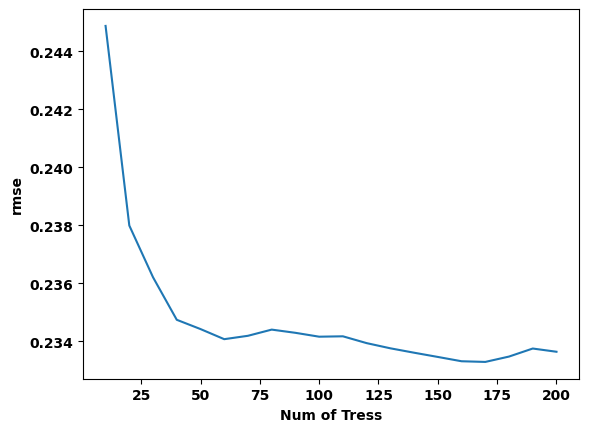

In [54]:
plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.xlabel('Num of Tress')
plt.ylabel('rmse');

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25

In [55]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        scores.append((d, n, rmse))

In [56]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

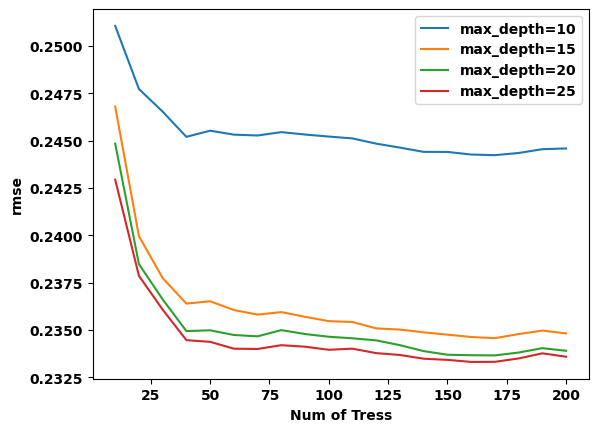

In [57]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)
    plt.xlabel('Num of Tress')
    plt.ylabel('rmse')
    plt.legend();

# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `total_rooms`
* `median_income`
* `total_bedrooms`
* `longitude`

In [58]:
rf = RandomForestRegressor(n_estimators=10,
                           max_depth=20,
                           random_state=1,
                           n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

In [59]:
features = dv.get_feature_names_out()
features

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=INLAND', 'ocean_proximity=OCEAN',
       'population', 'total_bedrooms', 'total_rooms'], dtype=object)

In [60]:
rf_f_i = pd.DataFrame(data = rf.feature_importances_, 
                      index=dv.get_feature_names_out(), 
                      columns = ["Feature Importance"]).sort_values("Feature Importance", ascending=False)
rf_f_i

,Feature Importance
median_income,0.335299
ocean_proximity=OCEAN,0.255562
ocean_proximity=INLAND,0.110718
latitude,0.102402
longitude,0.085810
housing_median_age,0.030502
population,0.027991
total_rooms,0.020545
total_bedrooms,0.015880
households,0.015291


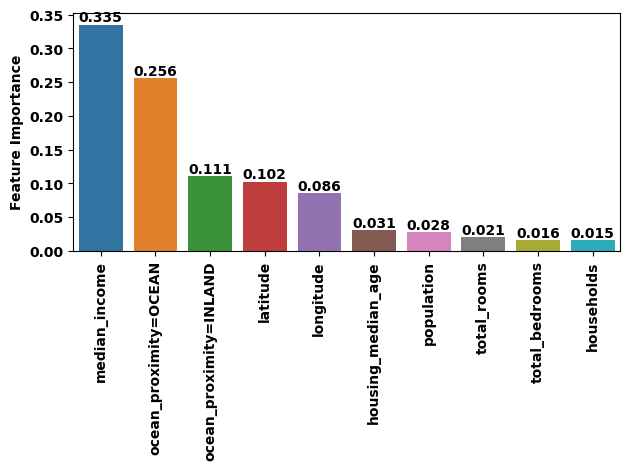

In [61]:
ax = sns.barplot(x = rf_f_i.index, y = 'Feature Importance', data = rf_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation = 90)
plt.tight_layout()

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value

In [62]:
import xgboost as xgb

In [63]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [64]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round=100)

In [65]:
y_pred = model.predict(dval)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

0.22897404244864047

In [66]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [67]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [68]:
scores = {}

In [74]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [75]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [76]:
scores

{'eta=0.3':     num_iter  train_rmse  val_rmse
 0          0     8.07362   8.07348
 1          5     1.38983   1.38852
 2         10     0.33195   0.34802
 3         15     0.22197   0.25614
 4         20     0.20036   0.24508
 5         25     0.18991   0.24021
 6         30     0.18204   0.23833
 7         35     0.17091   0.23452
 8         40     0.16422   0.23379
 9         45     0.15756   0.23302
 10        50     0.15210   0.23262
 11        55     0.14633   0.23167
 12        60     0.14218   0.23160
 13        65     0.13898   0.23169
 14        70     0.13471   0.23108
 15        75     0.13072   0.23036
 16        80     0.12835   0.23045
 17        85     0.12534   0.23010
 18        90     0.12174   0.22957
 19        95     0.11894   0.22906
 20        99     0.11656   0.22897,
 'eta=0.1':     num_iter  train_rmse  val_rmse
 0          0    10.37456  10.37545
 1          5     6.13433   6.13236
 2         10     3.63299   3.62939
 3         15     2.15901   2.15616
 4   

In [77]:
scores.keys()

dict_keys(['eta=0.3', 'eta=0.1'])

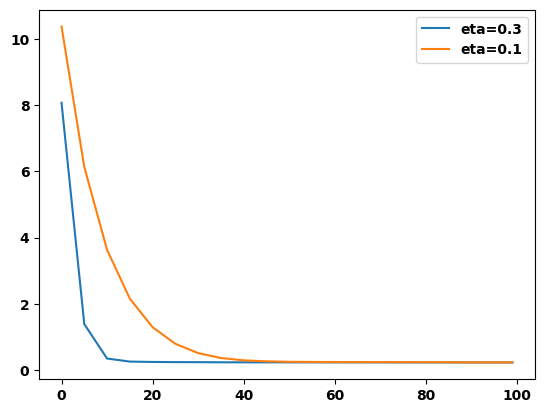

In [78]:
for key, df_score in scores.items() :
    plt.plot(df_score.num_iter, df_score.val_rmse, label=key)
    plt.legend();

In [79]:
df_score

,num_iter,train_rmse,val_rmse
0,0,10.37456,10.37545
1,5,6.13433,6.13236
2,10,3.63299,3.62939
3,15,2.15901,2.15616
4,20,1.29412,1.29329
5,25,0.78993,0.79342
6,30,0.50217,0.51149
7,35,0.34590,0.36371
8,40,0.26743,0.29345
9,45,0.23014,0.26315


In [100]:
pd.DataFrame.from_dict(scores.get('eta=0.3')).nsmallest(n=1, columns='val_rmse')

,num_iter,train_rmse,val_rmse
20,99,0.11656,0.22897


In [101]:
pd.DataFrame.from_dict(scores.get('eta=0.1')).nsmallest(n=1, columns='val_rmse')

,num_iter,train_rmse,val_rmse
20,99,0.17,0.23234
